Student Name:
Student Reg#: 

In [5]:
import chime
chime.notify_exceptions()

# Deep Learning 2024

In this notebook
- The end-to-end crash course of DL is explained as coding.

Classroom code: 
- o64a7np

Notebook Authors:
- Eng. Ahmed Métwalli
- Eng. Alia Elhefny

## Environment Preparation:
- Download anaconda: https://www.anaconda.com/download/success
- Create a new environment called 'DL_SEPT_2024'
    - Set Python version 3.11.x
    - Install:
        - Notebook
        - JupyterLab
        - VS Code
        - CMD Prompt
        - Powershell Prompt
    - In Python install basic packages (pip install `package`):
        - pandas
        - numpy
        - matplotlib
        - seaborn
        - tensorflow
        - keras
        - sklearn
        - chime

## Section 1

In our traditional Data Science Lifecycle, the main change we have over the course is within the Data Modelling block, where the algorithm used is neural network related, instead of Machine Learning methods.

<img src = "DS!.png">

### Mathematical Model of the Perceptron
A perceptron a.k.a (Linear Binary Classifier) is a linear classifier that makes decisions based on a linear function. The mathematical model can be represented as follows:

1. **Linear Combination:**
   $$
   z = \mathbf{W} \cdot \mathbf{X} + b
   $$
   - **W**: Weight vector.
   - **X**: Input feature vector.
   - **b**: Bias term.

2. **Activation Function:**
   $$
   y = \text{step}(z)
   $$
   - The step function is a threshold function that outputs 1 if z >= 0 and 0 otherwise.

3. **Perceptron Learning Rule:**
   The perceptron adjusts its weights and bias to minimize the classification error using the following rule:
   $$
   \Delta \mathbf{W} = \eta \cdot (y_{\text{true}} - y_{\text{pred}}) \cdot \mathbf{X}
   $$
   $$
   \Delta b = \eta \cdot (y_{\text{true}} - y_{\text{pred}})
   $$
   - **eta**: Learning rate.
   - **y_true**: True label of the data point.
   - **y_pred**: Predicted label by the perceptron.

### Steps to Build the Perceptron Class

1. **Initialization:**
   - Define a class `Perceptron` with attributes for the learning rate, number of iterations, weights, and bias.
   - Initialize the weights and bias to zero.

2. **Training (`fit` Method):**
   - For each training example, compute the linear combination `z`.
   - Apply the activation function to determine the predicted output `y`.
   - Update the weights and bias using the perceptron learning rule.

3. **Prediction (`predict` Method):**
   - Compute the linear combination `z` for given input features.
   - Apply the activation function to predict the output.

This unit is called Perceptron

<img src = "Perceptron.gif">

### Objective of the Code

- **Train the Perceptron** to solve logical operations such as OR, AND, and XOR.
- **Visualize Decision Boundaries** to understand how the perceptron separates data points.
- **Highlight Limitations** by demonstrating that the perceptron fails to solve non-linearly separable problems like XOR.

### Key Takeaways [HINTS]
- The perceptron is effective for linearly separable data.
- For complex datasets, more sophisticated models like Multi-Layer Perceptrons are required.


In [ ]:
import numpy as np, pandas as pd # Data manipulation libraries
import matplotlib.pyplot as plt # Data visualization

# Creation of the perceptron class including all important methods
class Perceptron:
    def __init__(self, learning_rate= ..., n_iters= ...):
        
        self.learning_rate = ...
        self.n_iters = ...
        self.activation_func = ... 
        self.weights = ...
        self.bias = ...
        self.log = pd.DataFrame(columns=["Iteration", "Weights", "Bias", "Actual", "Predicted"]) # DF for logging purposes.

    def _sigmoid_function(self, x): # fill in the code
        return ...
    
    def fit(self, X, y):
        n_samples, n_features = X.shape # returns the number of samples (rows) and features (columns).
        self.weights = ...
        self.bias = ...
        self._log(0, X, y) # Logging initial weights and bias as 0
        # Gradient descent algorithm
        for iteration in range(1, self.n_iters + 1): #The outer loop runs for the number of iterations (self.n_iters).
            for idx, x_i in enumerate(X): #The inner loop iterates over each sample x_i in the dataset X.
                linear_output = ... # Calc. the linear combination of weights and features plus bias.
                y_predicted = self.activation_func(...) #Apply activation func.
                # Perceptron learning rule update
                update = ... # Update rule
                self.weights += update * x_i # Equation applied
                self.bias += update
            # Logger operation
            self._log(iteration, X,y ) # Logging weights, bias, and predictions at each iteration

    def _log(self, iteration, X, y):
        """Log the weights and bias for each iteration."""
        y_predicted = self.predict(X) # Calculate predictions for the current weights and bias
        log_entry = pd.DataFrame({
            "Iteration": [iteration] * len(X), # Repeating the current iteration for each data point
            "Weights": [self.weights.copy()], # Because weights are stored in array-like so that are mutable 
            "Bias": [self.bias], # Bias is scalar immutable therefore no copy operation added
            "Actual": y, # Log the actual output
            "Predicted": y_predicted # Log the predicted output
        })
        self.log = pd.concat([self.log, log_entry], ignore_index=True)

    def predict(self, X):
        """This function uses the trained weights and bias to predict labels for input data X."""
        linear_output = ...
        y_predicted = self.activation_func(...)
        return ...

# Utility class for dataset creation and visualization
class Utility: #Utility programming-wise covers 
    @staticmethod #Static method unlike classes with init, it doesn't need to access 'self'
    def plot_decision_boundary(X, y, model, title):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  #X[:, 0] and X[:, 1] represent the two features in the dataset X.
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # (+ or - 1) extends the plotting area slightly beyond the points
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), # Helps us to generate the coordinates data from individual arrays
                            np.arange(y_min, y_max, 0.01)) # and visualize the decision boundary
        # generates values from x_min to x_max with a step of 0.01. This creates a fine grid for smooth plotting.
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # Ravel flattens the 2d arrays
        Z = Z.reshape(xx.shape) # Z is reshaped back into a 2D same shape as xx and yy for plotting the decision boundary.
        plt.contourf(xx, yy, Z, alpha=0.8) # alpha=0.8 parameter controls the transparency of the contour plot.
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50) # X, y, color, bordercolor, marker, markersize
        plt.title(title)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()
        
    @staticmethod
    def create_logical_dataset(logical_operator):
        if logical_operator == 'OR':
            X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
            y = np.array([0, 1, 1, 1])
        elif logical_operator == 'AND':
            X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
            y = np.array([0, 0, 0, 1])
        elif logical_operator == 'XOR':
            X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
            y = np.array([0, 1, 1, 0])
        else:
            raise ValueError("Unknown logical operator!")
        
        # Create a pandas DataFrame for better visualization
        df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
        df["Label"] = y
        display(df)
        return X, y

# Helper function to train and visualize the perceptron on a given dataset
class Helper: #Helper generally focused on performing small, specific series of operations (Handling scenarios)
    @staticmethod
    def train_and_visualize(logical_operator):
        X, y = Utility.create_logical_dataset(logical_operator)
        perceptron = Perceptron(learning_rate=0.1, n_iters=10)
        perceptron.fit(X, y)
        Utility.plot_decision_boundary(X, y, perceptron, f'{logical_operator} Perceptron Decision Boundary')
        
        # Display the weights and bias log in a DataFrame
        display(perceptron.log)

# OR Problem
print("Training Perceptron on OR dataset...")
Helper.train_and_visualize('OR')

# AND Problem
print("Training Perceptron on AND dataset...")
Helper.train_and_visualize('AND')

# XOR Problem
print("Training Perceptron on XOR dataset (expected to fail)...")
Helper.train_and_visualize('XOR')


### Conclusion: 
- The perceptron model works perfectly for linearly separable data such as OR and AND, but fails to solve the XOR problem due to its linear decision boundary.
- For non-linearly separable data, we need to use more advanced models like Multi-Layer Perceptrons.

### Some Terminologies!!:
DL:
- Epoch: One complete pass through the entire training dataset. This involves processing every sample in the dataset once.
- Iteration: In this code, an iteration refers to a single update of the model's parameters. Here, the number of iterations is set to the number of epochs, as each epoch updates the model for every sample in the dataset.

Programming:
- Utility: Utilities are typically more general-purpose and can be applied in a variety of contexts. They may include operations like file handling, data transformation, or mathematical calculations.
- Helper: Helpers are typically more narrowly scoped to support a specific part of an application or module. For example, a "helper" might be used to handle string formatting, validate inputs, or perform a small, repetitive task.

### Classwork 1: Solving the XOR Problem with a Multi-Layer Perceptron Using Keras

#### Objective:
- Implement a Multi-Layer Perceptron (MLP) using Keras to solve the XOR problem.
- Understand how to use high-level deep learning libraries for building, training, and evaluating neural networks.

#### Steps to Complete the Assignment:

#### Hints
```python
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Create the XOR inputs and outputs
X = np.array(...)
y = np.array(...)
# Build the model
model = Sequential()
model.add(Dense(...))
model.add(Dense(...))
# Compile the model
model.compile(loss='...', optimizer='...', metrics=['accuracy'])
# Train the model
model.fit(..., ..., epochs=...)
# Evaluate the model
loss, accuracy = model.evaluate(...)
print(f'Accuracy: {accuracy*100:.2f}%')



## Section 2: Multilayer Perceptron

- MLP is a type of artificial neural network used for supervised learning tasks, such as classification and regression.
- It consists of:
    - multiple layers of interconnected neurons:
        - including an input layer
        - one or more hidden layers, 
        - and an output layer.
    - activation functions
- Common activation functions for hidden layers include:
    - ReLU (Rectified Linear Unit)
    - sigmoid, 
    while the output layer's activation function depends on the problem type e.g. softmax for classification 
- Once your model is defined, you compile it with a loss function, an optimizer, and evaluation metrics. This configuration depends on the specific problem you're solving.
- Training an MLP involves feeding the training data through the network, computing gradients, and updating the model's weights using backpropagation and gradient descent algorithms.
- Python libraries offer built-in training loops or tools to facilitate the training process.
- You should split your dataset into training, validation, and test sets to evaluate your model's performance accurately.
- Monitoring training progress and visualizing results are essential steps.
- After training, you can save your model's weights and architecture for later use and deployment.


<img src="Pytorch_vs_Tensorflow.PNG" alt="Alternative text" />

### MLP on Iris Dataset

In this section we build an end to end data modelling for the iris dataset which is used for research/academic purposes in python builtin libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

#### Inspecting Data

In [ ]:
iris = ... # Load the Iris dataset
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
... # seeing the keys of the Iris Data

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
for key in iris.keys():
    if (iris[key] is not None):
        print(..., ...) # Display the key and the length of that key

data 150
target 150
target_names 3
DESCR 2780
feature_names 4
filename 8
data_module 21


In [ ]:
# Create a dataframe to include the iris data
df = pd.DataFrame(data=iris['data'],columns=...) # Feature names?
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [ ]:
# Map the classes of target names
class_mapping = {\
    ...:iris['target_names'][0],
    1:..., 
    2:iris['target_names'][2]
    }

In [ ]:
df['target'] = iris['target'] # add the target y to the dataframe
df['target_decoded'] = df['target'].map(class_mapping) # Target variable added to dataframe

In [ ]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_decoded
141,6.9,3.1,5.1,2.3,2,virginica
30,4.8,3.1,1.6,0.2,0,setosa
90,5.5,2.6,4.4,1.2,1,versicolor
86,6.7,3.1,4.7,1.5,1,versicolor
67,5.8,2.7,4.1,1.0,1,versicolor


#### Visualize some data

In [ ]:

class Utility:
    @staticmethod
    def scatter_features(feature_1,feature_2):
        # Plot the data for each class separately
        for target_class in df['target'].unique():
            subset = df[df['target'] == target_class]
            plt.scatter(subset[feature_1], subset[feature_2], 
                        label=class_mapping[target_class])

        # Add labels, title, and legend
        plt.xlabel('Petal Length (cm)')
        plt.ylabel('Petal Width (cm)')
        plt.title('Iris Dataset - True Classes')
        plt.legend(title='Classes')
        plt.show()

#### Data Modelling

In [ ]:
@staticmethod
def split_and_scale_data(df,test_size=0.2):
    X = df[[column for column in df.columns if column not in ['target','target_decoded']]]
    y = to_categorical(df['target'])
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = ... #Split data using train test split
    print('Data is split successfully')
    scaler = ... #Use the standardscaler
    X_train = ... # use the scaler method "fit_transform"
    X_test = ... # same here
    print('Data is scaled successfully')
    return ..., ..., ..., ...
@staticmethod
def model_creation(input_dim,hidden_layer_dim,output_dim):
    model = ... # use sequential
    model.add(Dense(..., ..., activation='relu'))  # Hidden layer (including dimension of input)
    model.add(Dense(..., activation='softmax'))  # Output layer
    print('Model created successfully')
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print('Model compiled successfully')
    return model
@staticmethod
def model_fit_evaluate(model,X_train,X_test,y_train,y_test,epochs,batch_size,verbose = 1):
    ... # Use fit the model
    print('Model is fit successfully')
    loss, accuracy = ... # Evaluate the model
    print('Model is evaluated as follows:')
    print(f'Test accuracy: {accuracy * 100:.2f}%')

Utility.split_and_scale_data = split_and_scale_data
Utility.model_creation = model_creation
Utility.model_fit_evaluate = model_fit_evaluate

In [ ]:
class Helper:
    @staticmethod
    def run_pipeline(df = df, input_dim = 4, hidden_layer_dim = 10, output_dim = 3, epochs = 100, batch_size=8,verbose = 0):
        Utility.scatter_features(feature_1='petal length (cm)',feature_2='petal width (cm)')
        Utility.scatter_features(feature_1='sepal length (cm)',feature_2='sepal width (cm)')
        X_train, X_test, y_train, y_test = ... # use your utilities
        model = ... # use ur utilities
        print(...) # print the summary of the model
        Utility.model_fit_evaluate(...,...,...,...,...,...,...,...)

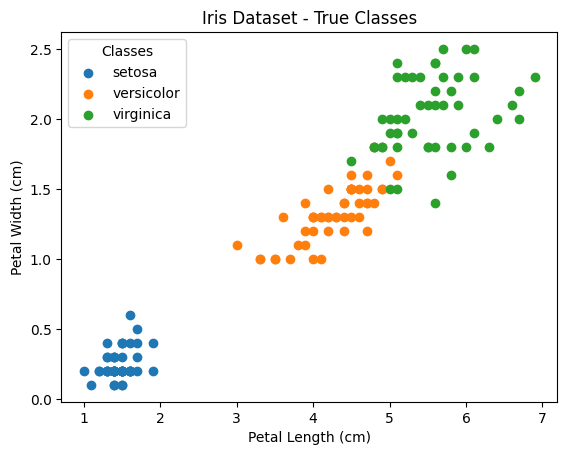

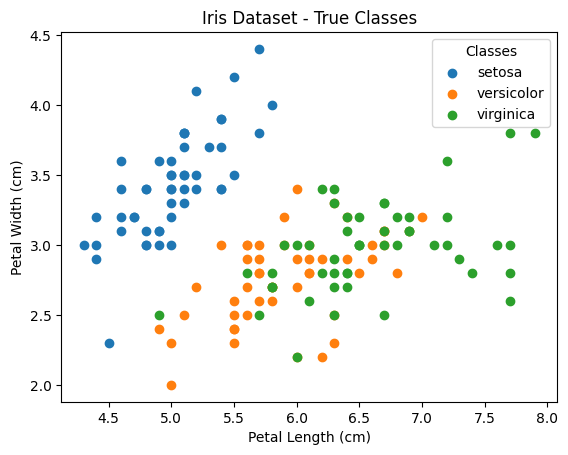

Data is split successfully
Data is scaled successfully
Model created successfully
Model compiled successfully
Model is fit successfully
2/2 [==============================] - 0s 8ms/step - loss: 0.1134 - accuracy: 0.9778
Model is evaluated as follows:
Test accuracy: 97.78%


In [ ]:
Helper.run_pipeline()

## Assignment 2: Implement the previous whole model using PyTorch